<div style="text-align:center">
    
# Pneumonia Detection from Chest X-rays

### Palomar College Final Project Fall 2022

#### Team Stell\*AI\*r<br><br>
    
#### Marjolein Legge-Beekman (Team Leader)<br> 
#### Alberto Delgado<br>
#### Wesley Newcomb <br>
#### Paul Sandeen <br>
#### Martin Zamora<br><br>

Part 1 - Machine Learning (Support Vector Machines, Decision Trees, K-Nearest Neighbors)<br>
Deep Learning (Artificial Nerual Network)
    
</div>

## Introduction

This project uses publicly available labeled chest X-ray image data of healthy patients and patients with Pneumonia. The X-ray image data will be used to train a classification algorithm to simulate making a diagnosis  for Pneumonia. Different sizes of training data will be used to perform a regression analysis to determine the optimal size of the training set.

## Intended Audience

The project assumes familiarity with the Python programming language and its associated libraries, including Numpy, pandas, matplotlib, Scikit-learn, Tensorflow, and Keras. A basic understanding of machine learning techniques is required.

## Data Source

The original data used for this project is publicy available from:
"Chest X-Ray Images (Pneumonia)"
https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/discussion
<br>The dataset is maintained by Paul Mooney

In [ ]:
# Connect to the Google Colab environment to Google Drive data store
# (Must be run everytime a new Colab environment is created)

# Import the Colab drive mapping library
from google.colab import drive

# Map the drive mountpoint
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [ ]:
# Import the essential data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
import seaborn as sns


In [ ]:
# Import the machine learning libraries from scikit-learn 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Import libraries for OS filesytem and image manipulation
import os
from PIL import Image

In [ ]:
# Import TensorFlow and Keras libraries
import tensorflow as tf
from tensorflow import keras
import cv2
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import load_img
from keras import backend as keras
from keras.models import Model
#from keras.models import Input
from tensorflow.keras import Input
from keras.models import load_model
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # Neural network library
from keras.layers import Dense


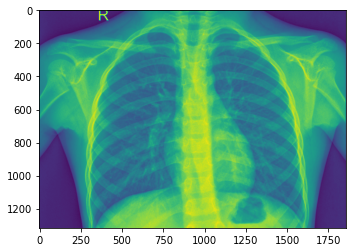

In [ ]:
# Display a sample image of a NORMAL chest X-ray
image_normal=image.imread(r"/content/gdrive/MyDrive/CSCI250_Data/archive/chest_xray/test/NORMAL/IM-0001-0001.jpeg")
plt.imshow(image_normal)

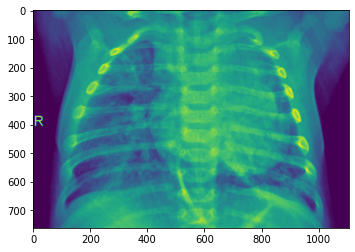

In [ ]:
# Display a sample image of a PNEUMONIA chest X-ray
image_pneumonia=image.imread(r"/content/gdrive/MyDrive/CSCI250_Data/archive/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg")
plt.imshow(image_pneumonia)

In [ ]:
# Map directories for NORMAL and PNEUMONIA image training data
normal_train = os.listdir(r"/content/gdrive/MyDrive/CSCI250_Data/archive/chest_xray/train/NORMAL")
pneumonia_train = os.listdir(r"/content/gdrive/MyDrive/CSCI250_Data/archive/chest_xray/train/PNEUMONIA")

In [ ]:
# Create a list to hold the images and labels for training data
image_array_train =[]
labels_train = []

In [ ]:
# Read the NORMAL traing data
for img in normal_train:
    try:
      image = cv2.imread(r"/content/gdrive/MyDrive/CSCI250_Data/archive/chest_xray/train/NORMAL/" + img)
      image_from_array = Image.fromarray(image, 'RGB')  # Read in the image with PIL image function in color mode.
      resize_img = image_from_array.resize((32, 32))    # Resize the image to 32 * 32
      image_array_train.append(np.array(resize_img))
      labels_train.append(0)
        
    except AttributeError:
        print("An error occured while reading in the image")

In [ ]:
# Read the PNEUMONIA traing data
for img in pneumonia_train:
    try:
        image=cv2.imread(r"/content/gdrive/MyDrive/CSCI250_Data/archive/chest_xray/train/PNEUMONIA/" + img)
        image_from_array = Image.fromarray(image, 'RGB')  # Read in the image with PIL image function in color mode.
        resize_img = image_from_array.resize((32, 32))    # Resize the image to 32 * 32
        image_array_train.append(np.array(resize_img))
        labels_train.append(1)
        
    except AttributeError:
        print("An error occur while reading the image")

In [ ]:
# Map directories for NORMAL and PNEUMONIA image test data
Normal_test = os.listdir(r"/content/gdrive/MyDrive/CSCI250_Data/archive/chest_xray/test/NORMAL")
Pneumonia_test = os.listdir(r"/content/gdrive/MyDrive/CSCI250_Data/archive/chest_xray/test/PNEUMONIA")

In [ ]:
# Map directories for NORMAL and PNEUMONIA image test data
image_arr_test =[]
labels_test = []


In [ ]:
# Read the NORMAL testing data
for img in Normal_test:
    try:
        image = cv2.imread(r"/content/gdrive/MyDrive/CSCI250_Data/archive/chest_xray/test/NORMAL/" + img)
        image_from_array = Image.fromarray(image, 'RGB')  #Read in the image with PIL image function in colour mode.
        resize_img = image_from_array.resize((32, 32))    #Resize the image to 32 * 32
        image_arr_test.append(np.array(resize_img))
        labels_test.append(0)
        

    except AttributeError:
      print("An error occured while reading in the image")

In [ ]:
# Read the PNEUMONIA testing data
for img in Pneumonia_test:
    try:
        image=cv2.imread(r"/content/gdrive/MyDrive/CSCI250_Data/archive/chest_xray/test/PNEUMONIA/"  + img)
        image_from_array = Image.fromarray(image, 'RGB')
        resize_img = image_from_array.resize((32, 32))
        image_arr_test.append(np.array(resize_img))
        labels_test.append(1)
        
    except AttributeError:
        print("An error occur while reading the image")

In [ ]:
# Place the training data and labels into NumPy arrays
train_data = np.array(image_array_train)
train_labels = np.array(labels_train)
idx = np.arange(train_data.shape[0])
np.random.shuffle(idx)
train_data = train_data[idx]
train_labels = train_labels[idx]

In [ ]:
# Place the testing data and labels into MumPy arrays
test_data = np.array(image_arr_test)
test_labels = np.array(labels_test)
idxt = np.arange(test_data.shape[0])
np.random.shuffle(idxt)
test_data = test_data[idxt]
test_labels = test_labels[idxt]

In [ ]:
# Print the shape of the train and test data NumPy arrays
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(5216, 32, 32, 3)
(5216,)
(624, 32, 32, 3)
(624,)


In [ ]:
# Print the shape of the test and train label NumPy arrays
test_labels=test_labels.reshape(test_labels.shape[0],1)
train_labels=train_labels.reshape(train_labels.shape[0],1)
print(train_labels.shape)
print(test_labels.shape)

(5216, 1)
(624, 1)


In [ ]:
###############################################

In [ ]:
# Perform the scikit-learn train-test-split
X_train, X_test, Y_train, Y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=34)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [ ]:
# Flatten the arays and display the results
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2]*X_train.shape[3])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2]*X_test.shape[3])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (4172, 3072)
X test flatten (1044, 3072)


In [ ]:
# Show the label data
print("y train: ",Y_train.shape)
print("y test: ",Y_test.shape)

y train:  (4172, 1)
y test:  (1044, 1)


In [ ]:
# Refill the train and test variables with the flattened version and display the results
x_train = X_train_flatten
x_test = X_test_flatten
y_train = Y_train
y_test = Y_test
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4172, 3072)
x test:  (1044, 3072)
y train:  (4172, 1)
y test:  (1044, 1)


In [ ]:
# Method to build the Artificial Neural Netowrk using Keras and TensorFlow
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

<ipython-input-29-b72cfb235276>:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)


Epoch 1/100
87/87 [==============================] - 1s 3ms/step - loss: 0.4526 - accuracy: 0.7925
Epoch 2/100
87/87 [==============================] - 0s 3ms/step - loss: 0.3018 - accuracy: 0.8946
Epoch 3/100
87/87 [==============================] - 0s 3ms/step - loss: 0.2639 - accuracy: 0.9223
Epoch 4/100
87/87 [==============================] - 0s 3ms/step - loss: 0.2816 - accuracy: 0.9072
Epoch 5/100
87/87 [==============================] - 0s 3ms/step - loss: 0.2536 - accuracy: 0.9213
Epoch 6/100
87/87 [==============================] - 0s 3ms/step - loss: 0.2218 - accuracy: 0.9421
Epoch 7/100
87/87 [==============================] - 0s 3ms/step - loss: 0.2164 - accuracy: 0.9486
Epoch 8/100
87/87 [==============================] - 0s 3ms/step - loss: 0.2027 - accuracy: 0.9507
Epoch 9/100
87/87 [==============================] - 0s 2ms/step - loss: 0.2054 - accuracy: 0.9374
Epoch 10/100
87/87 [==============================] - 0s 3ms/step - loss: 0.2206 - accuracy: 0.9317
Epoch 11/

In [ ]:
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.4625 - accuracy: 0.7526
Epoch 2/100
131/131 [==============================] - 0s 3ms/step - loss: 0.2927 - accuracy: 0.9094
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.9262
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.9391
Epoch 5/100
131/131 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.9444
Epoch 6/100
131/131 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9461
Epoch 7/100
131/131 [==============================] - 0s 3ms/step - loss: 0.1973 - accuracy: 0.9487
Epoch 8/100
131/131 [==============================] - 0s 3ms/step - loss: 0.1879 - accuracy: 0.9485
Epoch 9/100
131/131 [==============================] - 0s 3ms/step - loss: 0.1851 - accuracy: 0.9504
Epoch 10/100
131/131 [==============================] - 0s 3ms/step - loss: 0.1814 - accura

In [ ]:
print("score : ",classifier.score(x_test,y_test))


33/33 [==============================] - 0s 2ms/step - loss: 0.1409 - accuracy: 0.9492
score :  0.9492337107658386


In [ ]:
# Print the confusion matrix for the ANN
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[266  15]
 [ 38 725]]


In [ ]:
# END OF ANN CODE


In [ ]:
# Beginning of scikit-learn SVC Code


In [ ]:
# Implement a support vector machine (SVM) with SVC
svm_classifier = SVC(kernel="linear") # default kernel=rbf
# training using 'training data'
svm_classifier.fit(x_train, y_train) # fit the model for training data

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
# Use the SVM to predict the 'target' for 'training data'
svm_prediction_training_targets = svm_classifier.predict(x_train)
svm_self_accuracy = accuracy_score(y_train, svm_prediction_training_targets)
print("Accuracy for training data (SVM self accuracy):", svm_self_accuracy)

Accuracy for training data (SVM self accuracy): 1.0


In [ ]:
# Use the SVM to predict the 'target' for 'test data'
svm_prediction_test_targets = svm_classifier.predict(x_test)
svm_test_accuracy = accuracy_score(y_test, svm_prediction_test_targets)
print("Accuracy for test data (SVM):", svm_test_accuracy)

Accuracy for test data (SVM): 0.9588122605363985


In [ ]:
# Display the SVM confusion matrix
svm_cm = confusion_matrix(y_test,svm_prediction_test_targets)
print(svm_cm)

[[262  19]
 [ 24 739]]


In [ ]:
# Use the Decision Tree Classifier
dtc_classifier = DecisionTreeClassifier()
# training using 'training data'
dtc_classifier.fit(x_train, y_train) # fit the model for training data

DecisionTreeClassifier()

In [ ]:
# predict the 'target' for 'training data'
dtc_prediction_training_targets = dtc_classifier.predict(x_train)
dtc_self_accuracy = accuracy_score(y_train, dtc_prediction_training_targets)
print("Accuracy for training data (dtc self accuracy):", dtc_self_accuracy)

Accuracy for training data (dtc self accuracy): 1.0


In [ ]:
# predict the 'target' for 'test data'
dtc_prediction_test_targets = dtc_classifier.predict(x_test)
dtc_test_accuracy = accuracy_score(y_test, dtc_prediction_test_targets)
print("Accuracy for test data (DTC):", dtc_test_accuracy)

Accuracy for test data (DTC): 0.8812260536398467


In [ ]:
# Print the confusion matrix
dtc_cm = confusion_matrix(y_test, dtc_prediction_test_targets)
print(dtc_cm)

[[217  64]
 [ 60 703]]


In [ ]:
# Use K-Nearest Neighbors (k-NN) Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)
# training using 'training data'
knn_classifier.fit(x_train, y_train) # fit the model for training data

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
# predict the 'target' for 'training data'
knn_prediction_training_targets = knn_classifier.predict(x_train)
knn_self_accuracy = accuracy_score(y_train, knn_prediction_training_targets)
print("Accuracy for training data (knn self accuracy):", knn_self_accuracy)

Accuracy for training data (knn self accuracy): 0.9566155321188878


In [ ]:
# predict the 'target' for 'test data'
knn_prediction_test_targets = knn_classifier.predict(x_test)
knn_test_accuracy = accuracy_score(y_test, knn_prediction_test_targets)
print("Accuracy for test data (KNN):", knn_test_accuracy)

Accuracy for test data (KNN): 0.9482758620689655


In [ ]:
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, knn_prediction_test_targets)
print(knn_cm)

[[246  35]
 [ 19 744]]


In [ ]:
# End scikit-learn section